Internship on Data Science and Analytics - Project 1
Credit Score Classiﬁcation Model Development


**Phase 1 : Week 1**

 Importing required libraries

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Loading Dataset

In [ ]:
df = pd.read_csv("/content/credit.csv")

In [ ]:
df.shape

(100000, 28)

In [ ]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


**Exploratory Data Analysis (EDA):**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

Handling Missing Values

In [ ]:
# Finding missing values in the DataFrame
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64




*   **No missing values** in the dataset




In [ ]:
# Checking duplicate rows except first
# occurrence based on all columns
duplicate = df[df.duplicated()]

print("Duplicate Rows :")

# Print the resultant Dataframe
duplicate

Duplicate Rows :


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


*   **No Duplicate Rows** in the dataset

Outliers detection

In [ ]:
# Filter out numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Function to calculate Z-scores and identify outliers
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

# Define threshold for Z-score
threshold = 3

# Create an empty DataFrame to store outlier detection results
outliers_df = pd.DataFrame()

# Iterate over each numerical column and detect outliers
for column in numerical_columns.columns:
    outliers_df[column] = detect_outliers_zscore(numerical_columns[column], threshold=threshold)

# Print the number of outliers detected in each numerical column
for column in outliers_df.columns:
    num_outliers = outliers_df[column].sum()
    print(f'Column "{column}": {num_outliers} outliers detected')

# Optionally, you can print the indices or values of the outliers as well
# for column in outliers_df.columns:
#     print(f'Column "{column}": {outliers_df[column].sum()} outliers detected')
#     print(df[outliers_df[column]])

Column "ID": 0 outliers detected
Column "Customer_ID": 0 outliers detected
Column "Month": 0 outliers detected
Column "Age": 0 outliers detected
Column "SSN": 0 outliers detected
Column "Annual_Income": 1088 outliers detected
Column "Monthly_Inhand_Salary": 1055 outliers detected
Column "Num_Bank_Accounts": 0 outliers detected
Column "Num_Credit_Card": 0 outliers detected
Column "Interest_Rate": 0 outliers detected
Column "Num_of_Loan": 0 outliers detected
Column "Delay_from_due_date": 0 outliers detected
Column "Num_of_Delayed_Payment": 0 outliers detected
Column "Changed_Credit_Limit": 0 outliers detected
Column "Num_Credit_Inquiries": 0 outliers detected
Column "Outstanding_Debt": 584 outliers detected
Column "Credit_Utilization_Ratio": 16 outliers detected
Column "Credit_History_Age": 0 outliers detected
Column "Total_EMI_per_month": 1356 outliers detected
Column "Amount_invested_monthly": 1616 outliers detected
Column "Monthly_Balance": 1703 outliers detected


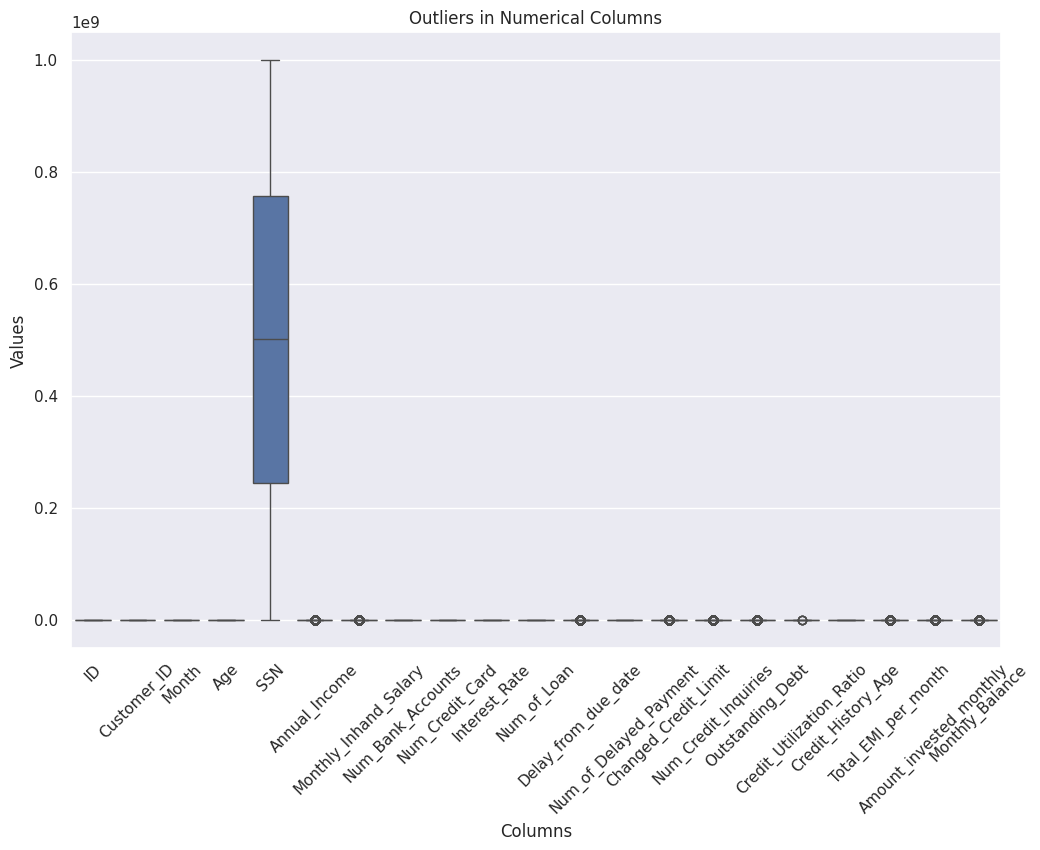

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Melt the DataFrame to combine all numerical columns into a single column
melted_df = pd.melt(df[numerical_cols])

# Create a boxplot or violin plot to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_df, x='variable', y='value')
plt.xticks(rotation=45)
plt.title('Outliers in Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()


In [ ]:
column_name = 'Annual_Income'

# Calculate the Z-score for the column
z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()
z_score_threshold = 3

# Finding outlier values based on the Z-score threshold
outlier_values = df[abs(z_scores) > z_score_threshold][column_name]

# Display the outlier values
print("Outlier Values in", column_name, ":")
print(outlier_values)


Outlier Values in Annual_Income :
1728     173196.32
1729     173196.32
1730     173196.32
1731     173196.32
1732     173196.32
           ...    
98931    175718.64
98932    175718.64
98933    175718.64
98934    175718.64
98935    175718.64
Name: Annual_Income, Length: 1088, dtype: float64


In [ ]:
df.describe(include='all')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,100000.000000,100000,100000.000000,1.000000e+05,100000,100000.000000,100000.000000,100000.000000,...,100000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000,100000.000000,100000
unique,NaN,NaN,NaN,10128,NaN,NaN,15,NaN,NaN,NaN,...,3,NaN,NaN,NaN,3,NaN,NaN,6,NaN,3
top,NaN,NaN,NaN,Jessicad,NaN,NaN,Lawyer,NaN,NaN,NaN,...,Standard,NaN,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,NaN,NaN,NaN,48,NaN,NaN,7096,NaN,NaN,NaN,...,45848,NaN,NaN,NaN,52326,NaN,NaN,28616,NaN,53174
mean,80631.500000,25982.666640,4.500000,NaN,33.316340,5.004617e+08,NaN,50505.123449,4197.270835,5.368820,...,NaN,1426.220376,32.285173,221.220460,NaN,107.699208,55.101315,NaN,392.697586,NaN
std,43301.486619,14340.543051,2.291299,NaN,10.764812,2.908267e+08,NaN,38299.422093,3186.432497,2.593314,...,NaN,1155.129026,5.116875,99.680716,NaN,132.267056,39.006932,NaN,201.652719,NaN
min,5634.000000,1006.000000,1.000000,NaN,14.000000,8.134900e+04,NaN,7005.930000,303.645417,0.000000,...,NaN,0.230000,20.000000,1.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,43132.750000,13664.500000,2.750000,NaN,24.000000,2.451686e+08,NaN,19342.972500,1626.594167,3.000000,...,NaN,566.072500,28.052567,144.000000,NaN,29.268886,27.959111,NaN,267.615983,NaN
50%,80631.500000,25777.000000,4.500000,NaN,33.000000,5.006886e+08,NaN,36999.705000,3095.905000,5.000000,...,NaN,1166.155000,32.305784,219.000000,NaN,66.462304,45.156550,NaN,333.865366,NaN
75%,118130.250000,38385.000000,6.250000,NaN,42.000000,7.560027e+08,NaN,71683.470000,5957.715000,7.000000,...,NaN,1945.962500,36.496663,302.000000,NaN,147.392573,71.295797,NaN,463.215683,NaN


In [ ]:
# categorical columns
df.select_dtypes(include="object")

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Small_value_payments,Good
1,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments,Good
2,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments,Good
3,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments,Good
4,Aaron Maashoh,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...,...
99995,Nicks,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments,Poor
99996,Nicks,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Medium_value_payments,Poor
99997,Nicks,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments,Poor
99998,Nicks,Mechanic,"Auto Loan, and Student Loan",Good,No,Low_spent_Large_value_payments,Standard


In [ ]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

Data Visualization

<ipython-input-20-7162bbeab945>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Credit_Score'],palette="mako");


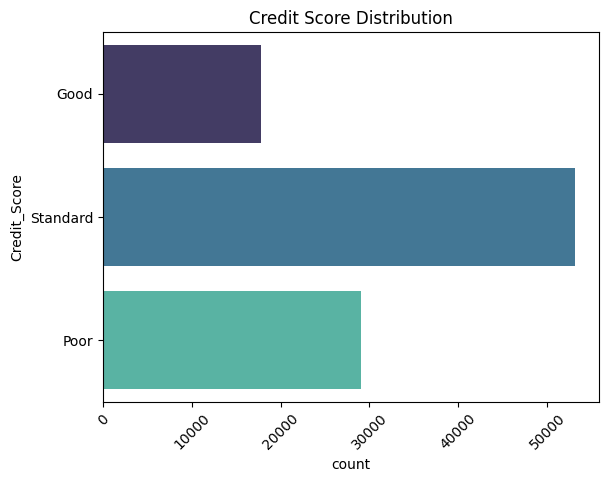

In [ ]:
sns.countplot(df['Credit_Score'],palette="mako");
plt.title('Credit Score Distribution')
plt.xticks(rotation=45);

In [ ]:
### Value counts of the column - Occupation
occupation_count = df['Occupation'].value_counts(dropna = False)
occupation_count

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

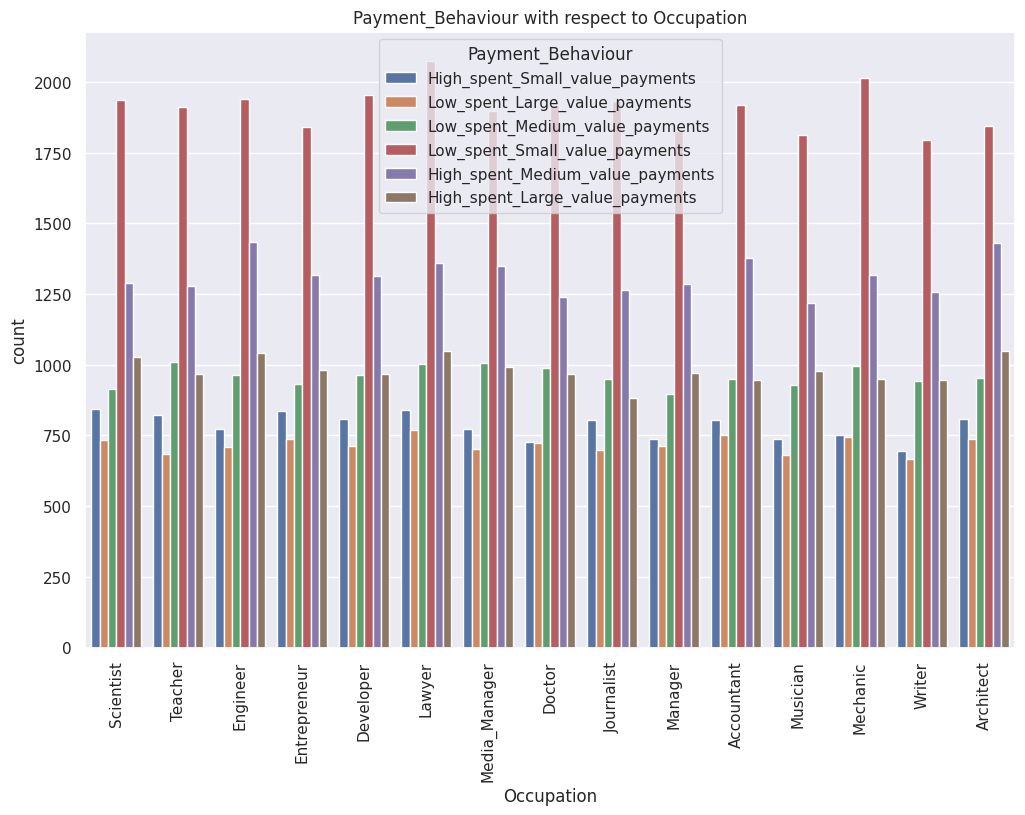

In [ ]:
fig = plt.figure(figsize= (12,8))
sns.countplot(data=df,x="Occupation",hue="Payment_Behaviour")
plt.xticks(rotation=90)
plt.title('Payment_Behaviour with respect to Occupation')
plt.show()

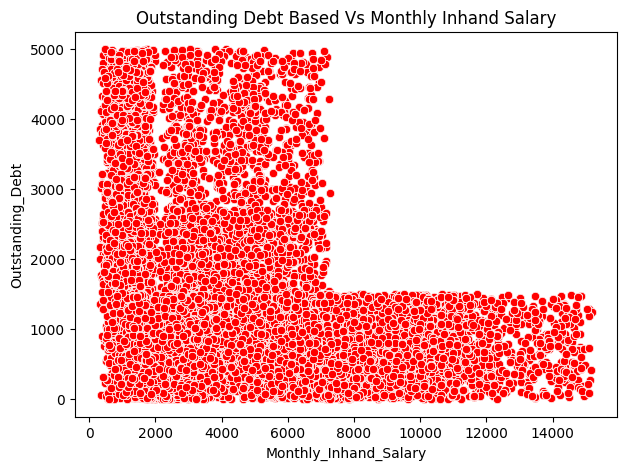

In [ ]:
plt.figure(figsize=(7,5))
plt.title('Outstanding Debt Based Vs Monthly Inhand Salary')
sns.scatterplot(data=df, x="Monthly_Inhand_Salary", y="Outstanding_Debt",color="red")
plt.show()


*   Outstanding debt will be higher for people with lower monthly_inhand_salary




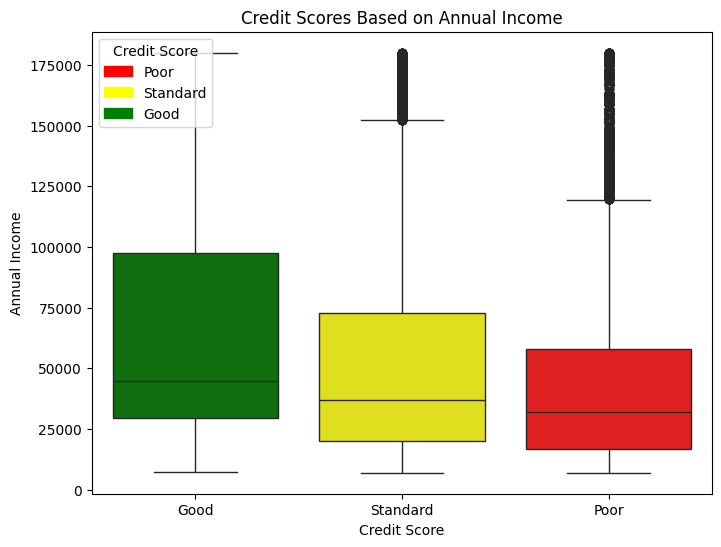

In [ ]:
import matplotlib.patches as mpatches

# Define the color palette
palette = {'Poor': 'red', 'Standard': 'yellow', 'Good': 'green'}

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, hue='Credit_Score', dodge=False, palette=palette)

# Customize the plot
plt.title('Credit Scores Based on Annual Income')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')

legend_labels = [mpatches.Patch(color=color, label=score) for score, color in palette.items()]
plt.legend(handles=legend_labels, title='Credit Score', loc='upper left')

# Show the plot
plt.show()

*   Credit Scores are **Good** for people with **higher Annual Income**

In [ ]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(10, 10), fontsize=10, autopct='%1.0f%%', radius=0.7)
        ax.set_title(str(col), fontsize = 12)
    plt.show()

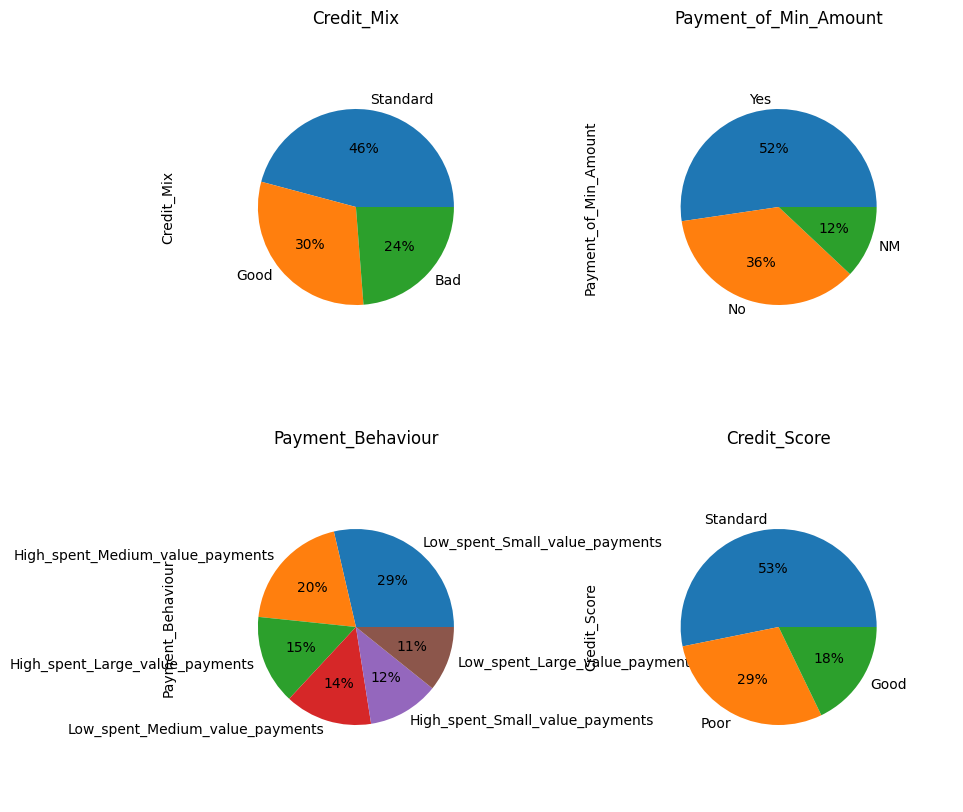

In [ ]:
pie_plot(df, ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'], 2,2)

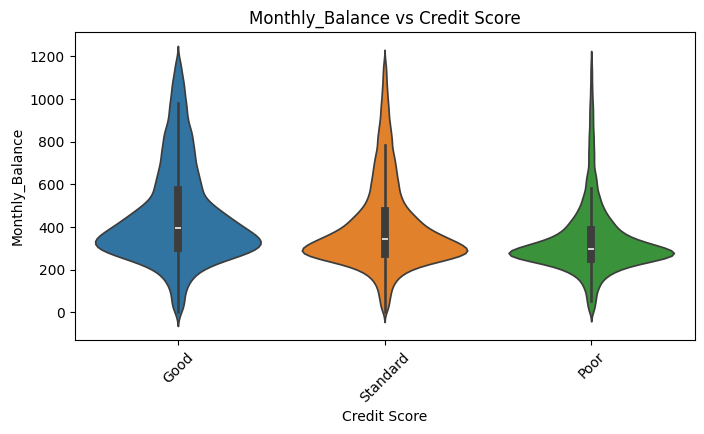

In [ ]:
numerical_column = 'Monthly_Balance'

# violin plot against 'Credit_Score'
plt.figure(figsize=(8,4))
sns.violinplot(x='Credit_Score', y=numerical_column, data=df, hue='Credit_Score')
plt.title(f'{numerical_column} vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel(numerical_column)
plt.xticks(rotation=45)
plt.show()

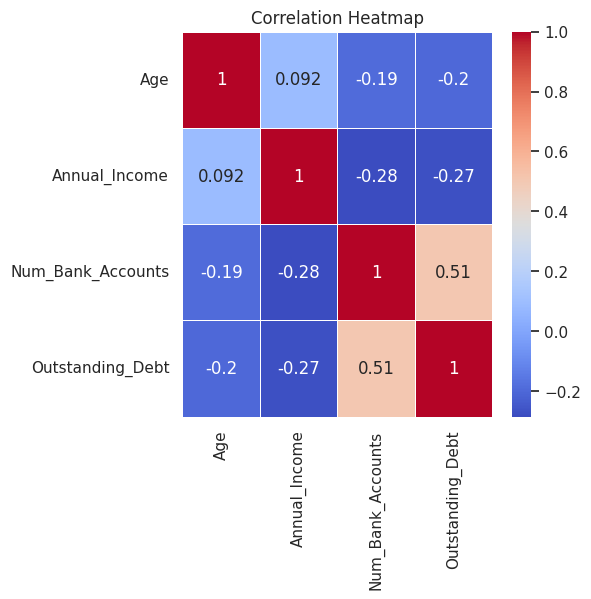

In [ ]:
columns = ['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Outstanding_Debt']
correlation_matrix = df[columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(5,5))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Set the title and display the plot
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
# Data Cleaning
df_copy = df
df_copy.shape

(100000, 28)

In [ ]:
# Display the original DataFrame
#print("Original DataFrame:")
# df_copy.shape

columns_to_drop = ['ID','Customer_ID','Name','SSN']
df_copy = df_copy.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print("\nDataFrame after dropping specified columns:")
df_copy.shape


DataFrame after dropping specified columns:


(100000, 24)

In [ ]:
# Convert float columns to integers
float_columns = ['Age','Num_Bank_Accounts','Num_Credit_Card']
df_copy[float_columns] = df_copy[float_columns].astype(int)

In [ ]:
# Convert float columns to integers
float_columns = ['Num_of_Loan']
df_copy[float_columns] = df_copy[float_columns].astype(int)

In [ ]:
# Dropping Occupation Column
columns_to_drop = ['Occupation']
df_copy = df_copy.drop(columns=columns_to_drop)

In [ ]:
df_copy.shape

(100000, 24)

In [ ]:
# Label encoding for Credit_Score column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_copy['Credit_Score_Encoded'] = label_encoder.fit_transform(df_copy['Credit_Score'])


In [ ]:
column_to_drop = 'Credit_Score'  # Replace 'column_name' with the name of the column you want to drop
df_copy.drop(column_to_drop, axis=1, inplace=True)

In [ ]:
# Renaming Column name 'Credit_Score_Encoded' to 'Credit_Score'
old_column_name = 'Credit_Score_Encoded'
new_column_name = 'Credit_Score'

# Rename the column
df_copy.rename(columns={old_column_name: new_column_name}, inplace=True)

In [ ]:
df_copy.head(5)

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,19114.12,1824.843333,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,0
1,2,23,19114.12,1824.843333,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,0
2,3,23,19114.12,1824.843333,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,0
3,4,23,19114.12,1824.843333,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,0
4,5,23,19114.12,1824.843333,3,4,3.0,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,0


## Data Split: Dividing the data into training, validation, and testing sets for model development.

In [ ]:
from sklearn.model_selection import train_test_split

# defining dataset
X, y = df_copy.drop("Credit_Score",axis=1).values , df_copy["Credit_Score"]


In [ ]:
X.shape

(100000, 22)

In [ ]:
y.shape

(100000,)

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)

Training set shape: (70000, 22) (70000,)


In [ ]:
# Spliting the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (70000, 22) (70000,)
Validation set shape: (15000, 22) (15000,)
Test set shape: (15000, 22) (15000,)


*   70% - Training Set
*   15% - Validation Set
*   15% - Test Set